In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('co2_mm_mlo.csv')

In [8]:
df

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [14]:
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

In [15]:
df.set_index('date', inplace=True)
df.index.freq = "MS"

In [16]:
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


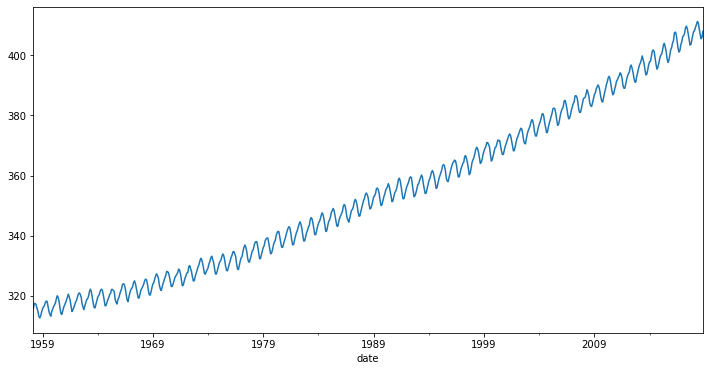

In [17]:
df.interpolated.plot(figsize=(12,6))

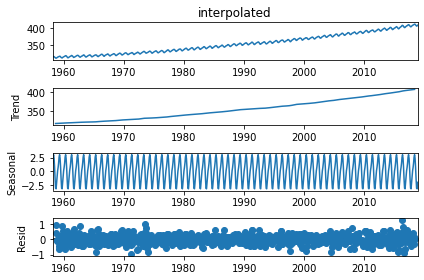

In [26]:
result = seasonal_decompose(df.interpolated, model="add")
result.plot();

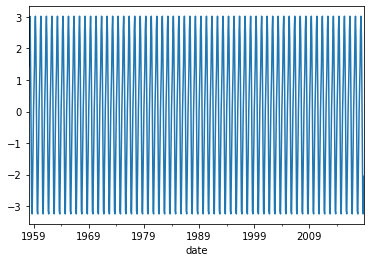

In [27]:
result.seasonal.plot()

In [28]:
# auto_arima(df.interpolated).summary() this will take a long time

stepwise_fit = auto_arima(
    df.interpolated,
    max_order=6,
    d=1,
    D=1,
    m=12,
    max_p=2,
    max_q=3,
    max_P=1,
    max_Q=1,
    stepwise=False,
    trace=True
)

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=848.375, BIC=857.522, Time=0.192 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=460.155, BIC=473.876, Time=1.257 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=671.928, BIC=685.649, Time=0.844 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=461.808, BIC=480.103, Time=2.022 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=756.017, BIC=769.738, Time=0.269 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=375.925, BIC=394.220, Time=4.027 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=574.179, BIC=592.473, Time=1.230 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=377.925, BIC=400.793, Time=2.682 seconds
Fit ARIMA(0,1,2)x(0,1,0,12) [intercept=True]; AIC=755.790, BIC=774.084, Time=0.407 seconds
Fit ARIMA(0,1,2)x(0,1,1,12) [intercept=True]; AIC=374.403, BIC=397.271, Time=3.265 seconds
Fit ARIMA(0,1,2)x(1,1,0,12) [intercept=True]; AIC=574.577, BIC=597.445, Time=1.474 seconds

In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -179.614
Date:                              Tue, 26 May 2020   AIC                            371.228
Time:                                      17:42:17   BIC                            398.670
Sample:                                           0   HQIC                           381.825
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.001      2.987      0.003       0.001       0.004
ma.L1         -0.3757      0.037    -10.196      0.000      -0.448      -0.303
ma.L2         -0.0301      0.039     -0.781      0.435      -0.106       0.045
ma.L3         -0.0898      0.037     -2.459      0.014      -0.161      -0.018
ma.S.L12      -0.8819      0.019    -45.710      0.000      -0.920      -0.844
sigma2         0.0943      0.005     20.568      0.000       0.085       0.103
===================================================================================
Ljung-Box (Q):                       42.40   Jarque-Bera (JB):                 4.95
Prob(Q):                              0.37   Prob(JB):                         0.08
Heteroskedasticity (H):               1.16   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
train = df.iloc[:717]
test = df.iloc[717:]

In [32]:
model = SARIMAX(train.interpolated, order=(0,1,3), seasonal_order=(0,1,[1],12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -178.952
Date:                              Tue, 26 May 2020   AIC                            367.904
Time:                                      17:45:10   BIC                            390.688
Sample:                                  03-01-1958   HQIC                           376.709
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3673      0.037    -10.048      0.000      -0.439      -0.296
ma.L2         -0.0255      0.039     -0.661      0.509      -0.101       0.050
ma.L3         -0.0766      0.037     -2.095      0.036      -0.148      -0.005
ma.S.L12      -0.8648      0.022    -39.243      0.000      -0.908      -0.822
sigma2         0.0951      0.005     20.349      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       38.66   Jarque-Bera (JB):                 4.43
Prob(Q):                              0.53   Prob(JB):                         0.11
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename("SARIMA (0, 1, 3)x(0, 1, [1], 12) Predictions")

In [34]:
predictions.head()

2017-12-01    406.614569
2018-01-01    407.832659
2018-02-01    408.587695
2018-03-01    409.495397
2018-04-01    411.058666
Freq: MS, Name: SARIMA (0, 1, 3)x(0, 1, [1], 12) Predictions, dtype: float64

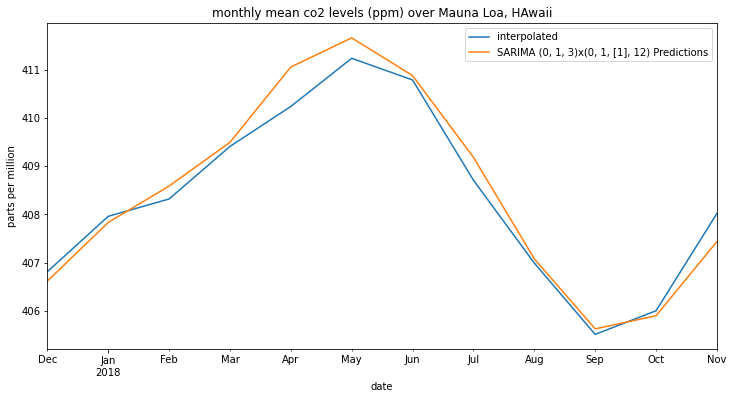

In [35]:
title = "monthly mean co2 levels (ppm) over Mauna Loa, HAwaii"
ylabel="parts per million"
xlabel="date"

ax=test.interpolated.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test.interpolated, predictions)
print(error)

0.13247648334894793


In [37]:
from statsmodels.tools.eval_measures import rmse 
error_rmse=rmse(test.interpolated, predictions)
print(error_rmse)

0.3639731904260916


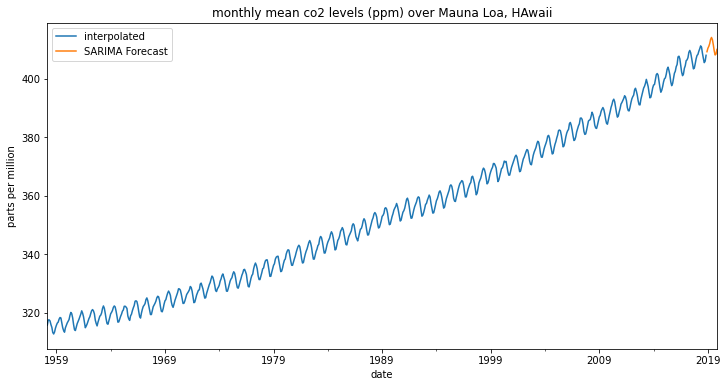

In [38]:
model = SARIMAX(df.interpolated, order=(0,1,3), seasonal_order=(0,1,[1],12))
results_forecast = model.fit()
fcast = results_forecast.predict(len(df), len(df) + 11, dynamic=False).rename("SARIMA Forecast")

title = "monthly mean co2 levels (ppm) over Mauna Loa, HAwaii"
ylabel="parts per million"
xlabel="date"

ax=df.interpolated.plot(legend=True, figsize=(12,6), title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()